In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

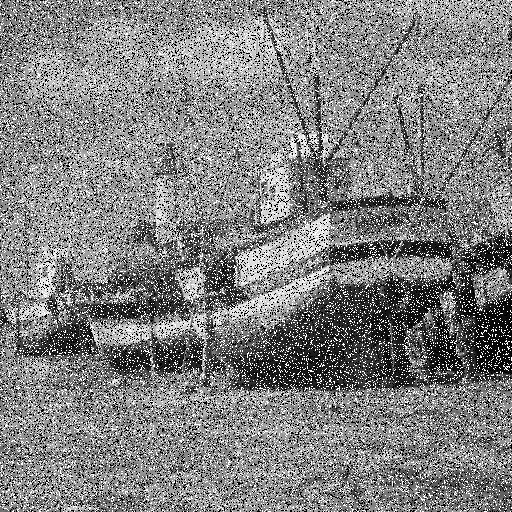

In [3]:
img = cv2.imread("/content/drive/MyDrive/Image processing /boatsnp.png",0)
cv2_imshow(img)

In [4]:
def adaptive_median_filter(image, max_kernel_size):
    height, width = img.shape

    new_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            kernel_size = 3
            while kernel_size <= max_kernel_size:
                pad = kernel_size // 2
                window = image[max(0, i - pad):min(height, i + pad + 1), max(0, j - pad):min(width, j + pad + 1)]

                sorted_vals = np.sort(window.flatten())

                median_val = sorted_vals[len(sorted_vals) // 2]

                min_val = np.min(sorted_vals)
                max_val = np.max(sorted_vals)

                # Apply the adaptive median filter
                if min_val < median_val < max_val:
                    if min_val < image[i, j] < max_val:
                        new_image[i, j] = image[i, j]
                    else:
                        new_image[i, j] = median_val
                    break
                else:
                    kernel_size += 2

            if kernel_size > max_kernel_size:
                new_image[i, j] = median_val

    return new_image

Text(0.5, 1.0, 'median filter')

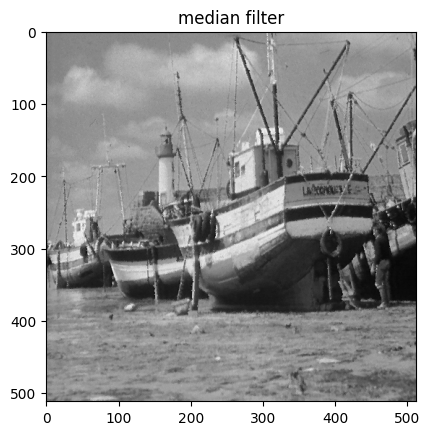

In [5]:
new_imag = adaptive_median_filter(img, 7)
plt.imshow(new_imag,cmap="gray")
plt.title('median filter')

In [6]:
s = 3
sMax =7
    
kernel_w = s
kernel_h = s

st =0
    
img_w = img.shape[0]
img_h = img.shape[1]

pad = np.zeros((img_w + kernel_w//2 , img_h + kernel_h//2))
pad[kernel_w//2: img_w + kernel_w//2 , kernel_h//2: img_h + kernel_h//2] = img.copy()

new_img = np.zeros((img_w,img_h))
    
for i in range (st, pad.shape[0]-kernel_w+1):
    for j in range ( st, pad.shape[1]-kernel_h+1):
        matrix = pad[i: i+ kernel_w, j: j + kernel_h]
        val = list ( matrix.flatten())
        zmed = np.median(val)
        zmax = np.max(val)
        zmin = np.min(val)
        zxy = img[i,j]
        a1 = zmed - zmin
        a2 = zmed - zmax
            
        if (a1>0 and a2<0):
           b1 = zxy - zmin
           b2 = zxy - zmax
           if ( b1>0 and b2<0 ):
               new_img[i,j] = zxy
           else:
               new_img[i,j] = zmed
        elif(st!=sMax):
            s = s + 1
            st=0
        elif(st>=sMax):
            new_img[i,j]=zmed


Text(0.5, 1.0, 'median filter')

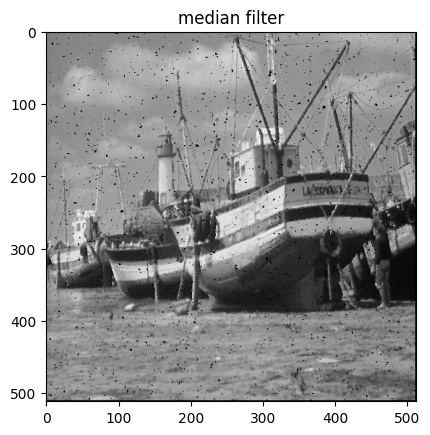

In [7]:
plt.imshow(new_img,cmap="gray")
plt.title('median filter')

In [12]:
def adaptive_max_filter(image, max_kernel_size):
    height, width = img.shape
    new_image = np.zeros_like(image)

    for i in range(height):
        for j in range(width):
            kernel_size = 3
            while kernel_size <= max_kernel_size:
                pad = kernel_size // 2
                max_pic = image[max(0, i - pad):min(height, i + pad + 1), max(0, j - pad):min(width, j + pad + 1)]

                max_val = max_pic[0, 0]
                for m in range(max_pic.shape[0]):
                    for n in range(max_pic.shape[1]):
                        if max_pic[m, n] > max_val:
                            max_val = max_pic[m, n]

                # Apply the adaptive maximum filter
                if max_val > image[i, j]:
                    new_image[i, j] = max_val
                    break
                else:
                    new_image[i, j] = image[i, j]
                    break
                kernel_size += 2

            if kernel_size > max_kernel_size:
                  new_image[i, j] = max_val
                

    return new_image

Text(0.5, 1.0, 'max filter')

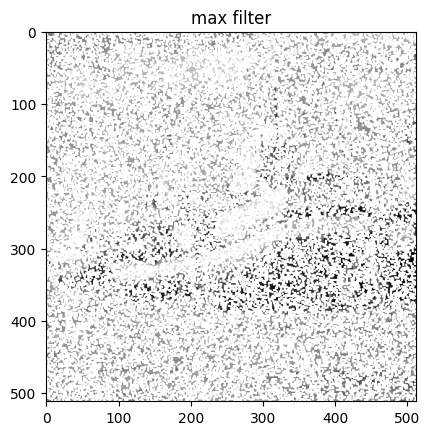

In [13]:
new_imag = adaptive_max_filter(img, 7)
plt.imshow(new_imag,cmap="gray")
plt.title('max filter')

Text(0.5, 1.0, 'min filter')

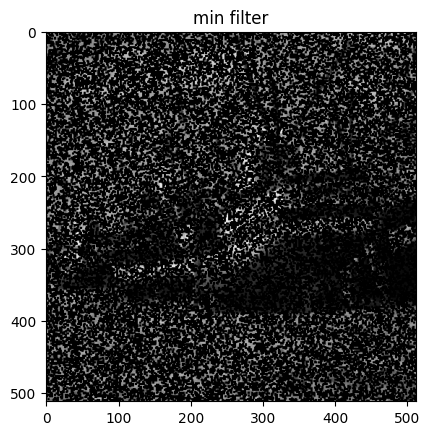

In [20]:
height, width = img.shape
new_image = np.zeros_like(img)

for i in range(height):
    for j in range(width):
        kernel_size = 3
        while kernel_size <= 7:
            pad = kernel_size // 2
            min_pic = img[max(0, i - pad):min(height, i + pad + 1), max(0, j - pad):min(width, j + pad + 1)]

            min_val = min_pic[0][0]
            for m in range(min_pic.shape[0]):
                for n in range(min_pic.shape[1]):
                    if min_pic[m, n] < min_val:
                       min_val = min_pic[m, n]

                  
            # Apply the adaptive minimum filter
            if min_val < img[i, j]:
                new_image[i, j] = min_val
                break
            else:
                new_image[i, j] = img[i, j]
                break
            kernel_size += 2

        # If the kernel size exceeds the maximum, use the minimum of the last kernel size
        if kernel_size > 7:
            new_image[i, j] = min_val
            
        
                

plt.imshow(new_image,cmap="gray")
plt.title('min filter')